## House price prediction¶

## Load Modules/Libraries¶

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
from pandas.api.types import CategoricalDtype
	
       

## Load dataset

In [6]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
train.shape
test.shape

(1459, 80)

## shape of data

In [9]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)


## Data integration

In [11]:
df = pd.concat([train, test])
df1 = df.drop("SalePrice", axis = 1)
test_y = df["SalePrice"]
df_copy = df.copy()
print("shape of integrated dataframe/df:", df.shape)




shape of integrated dataframe/df: (2919, 81)


In [12]:
test_y.shape

(2919,)

In [13]:
#print(df1.shape)

In [14]:

df_copy.shape

(2919, 81)

In [15]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


## get the brief information about data

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2919 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallCond  

In [18]:
df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            4
LotFrontage       486
LotArea             0
Street              0
Alley            2721
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType       1766
MasVnrArea         23
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           81
BsmtCond           82
BsmtExposure       82
BsmtFinType1       79
BsmtFinSF1          1
BsmtFinType2       80
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         1
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [19]:
int_features = df.select_dtypes(include=["int64"]).columns
print("total number of integer feature:", int_features.shape[0])
print("total integer features:",int_features.tolist())

total number of integer feature: 26
total integer features: ['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']


In [20]:
float_features = df.select_dtypes(include=["float64"]).columns
print("total number of float feature:", float_features.shape[0])
print("total float features:",float_features.tolist())

total number of float feature: 12
total float features: ['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'SalePrice']


In [21]:
cat_features = df.select_dtypes(include=["object"]).columns
print("total number of categorical feature:", cat_features.shape[0])
print("total categorical features:",cat_features.tolist())

total number of categorical feature: 43
total categorical features: ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


## get the statical information of numerical feature

In [23]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,2919.000000,2919.000000,2433.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2896.000000,2918.000000,2918.000000,2918.000000,2918.000000,2919.000000,2919.000000,2919.000000,2919.000000,2917.000000,2917.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2760.000000,2918.000000,2918.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,1460.000000
mean,1460.000000,57.137718,69.305795,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,441.423235,49.582248,560.772104,1051.777587,1159.581706,336.483727,4.694416,1500.759849,0.429894,0.061364,1.568003,0.380267,2.860226,1.044536,6.451524,0.597122,1978.113406,1.766621,472.874572,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737,180921.195890
std,842.787043,42.517628,23.344905,7886.996359,1.409947,1.113131,30.291442,20.894344,179.334253,455.610826,169.205611,439.543659,440.766258,392.362079,428.701456,46.396825,506.051045,0.524736,0.245687,0.552969,0.502872,0.822693,0.214462,1.569379,0.646129,25.574285,0.761624,215.394815,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,730.500000,20.000000,59.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,0.000000,220.000000,793.000000,876.000000,0.000000,0.000000,1126.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1960.000000,1.000000,320.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129975.000000
50%,1460.000000,50.000000,68.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.500000,0.000000,467.000000,989.500000,1082.000000,0.000000,0.000000,1444.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1979.000000,2.000000,480.000000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,2189.500000,70.000000,80.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.000000,0.000000,805.500000,1302.000000,1387.500000,704.000000,0.000000,1743.500000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2919.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1526.000000,2336.000000,6110.000000,5095.000000,2065.000000,1064.000000,5642.000000,3.000000,2.000000,4.000000,2.000000,8.000000,3.000000,15.000000,4.000000,2207.000000,5.000000,1488.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


In [24]:
df.describe().shape

(8, 38)

## visualise the null value


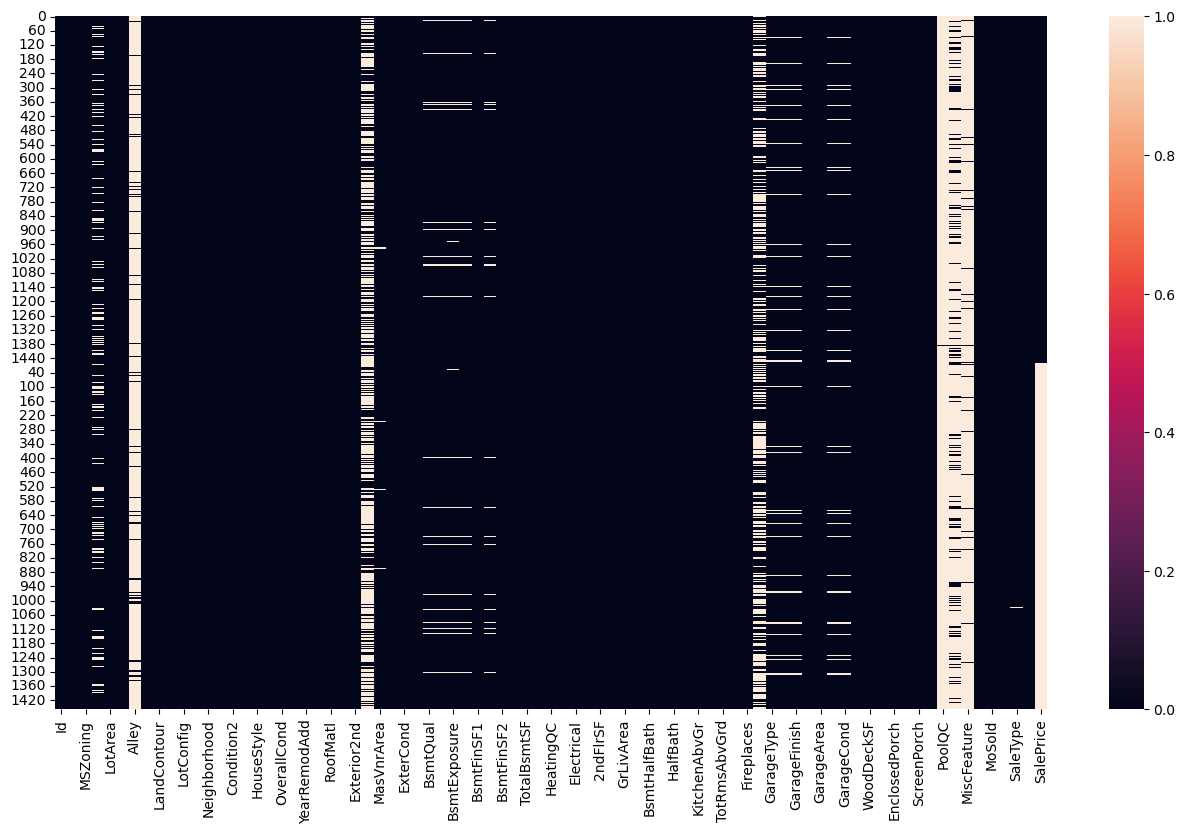

In [26]:
plt.figure(figsize=(16,9))
sns.heatmap(df.isnull())
plt.savefig("EDA_img/heatmap_DF_of_null_value.png")

## calculate the null value percentage of feature¶

In [28]:
null_count = df.isnull().sum()/df.shape[0]*100
null_count

Id                0.000000
MSSubClass        0.000000
MSZoning          0.137033
LotFrontage      16.649538
LotArea           0.000000
Street            0.000000
Alley            93.216855
LotShape          0.000000
LandContour       0.000000
Utilities         0.068517
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.034258
Exterior2nd       0.034258
MasVnrType       60.500171
MasVnrArea        0.787941
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.774923
BsmtCond          2.809181
BsmtExposure      2.809181
BsmtFinType1      2.706406
BsmtFinSF1        0.034258
BsmtFinType2      2.740665
BsmtFinSF2        0.034258
B

## Drop columns features


In [30]:
#""as per domain knowledge we will not drop those columns instead of null value we can fill NA""
null_count_50_per = null_count[null_count>50]
null_count_50_per

Alley          93.216855
MasVnrType     60.500171
PoolQC         99.657417
Fence          80.438506
MiscFeature    96.402878
dtype: float64

In [31]:
#""as per domain knowledge we will not drop those columns instead of null value we can fill NA""
null_count_50_20_per = null_count[(null_count>20 ) & (null_count<51)]
null_count_50_20_per

FireplaceQu    48.646797
SalePrice      49.982871
dtype: float64

In [32]:
#""as per domain knowledge we will not drop those columns instead of null value we can fill NA""
null_count_5_20_per = null_count[(null_count>5 ) & (null_count<20)]
null_count_5_20_per

LotFrontage     16.649538
GarageType       5.378554
GarageYrBlt      5.447071
GarageFinish     5.447071
GarageQual       5.447071
GarageCond       5.447071
dtype: float64

## visualisation¶

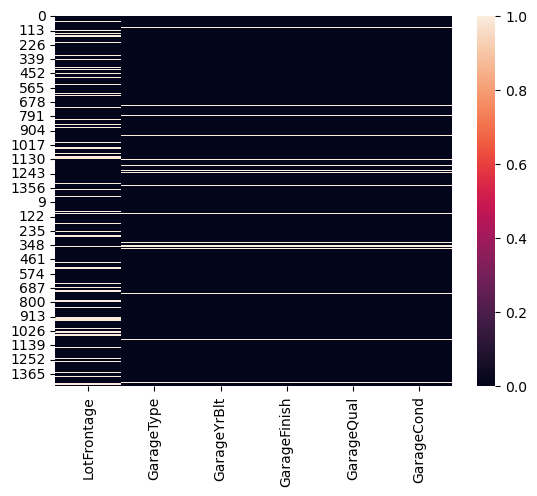

In [34]:
sns.heatmap(df[null_count_5_20_per.keys()].isnull())
plt.show()

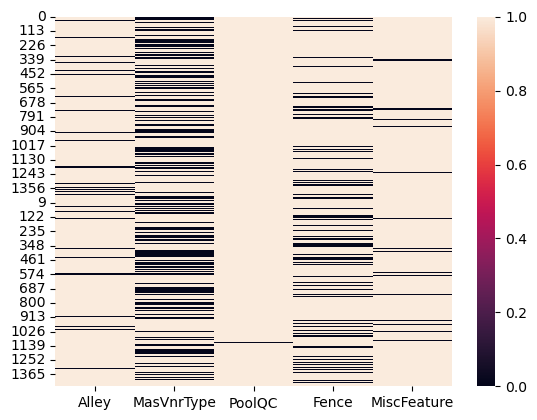

In [35]:
sns.heatmap(df[null_count_50_per.keys()].isnull())
plt.show()

In [36]:
missing_val_feat = null_count[null_count>0]
print("length of missing value", len(missing_val_feat))
print(missing_val_feat)

length of missing value 35
MSZoning         0.137033
LotFrontage     16.649538
Alley           93.216855
Utilities        0.068517
Exterior1st      0.034258
Exterior2nd      0.034258
MasVnrType      60.500171
MasVnrArea       0.787941
BsmtQual         2.774923
BsmtCond         2.809181
BsmtExposure     2.809181
BsmtFinType1     2.706406
BsmtFinSF1       0.034258
BsmtFinType2     2.740665
BsmtFinSF2       0.034258
BsmtUnfSF        0.034258
TotalBsmtSF      0.034258
Electrical       0.034258
BsmtFullBath     0.068517
BsmtHalfBath     0.068517
KitchenQual      0.034258
Functional       0.068517
FireplaceQu     48.646797
GarageType       5.378554
GarageYrBlt      5.447071
GarageFinish     5.447071
GarageCars       0.034258
GarageArea       0.034258
GarageQual       5.447071
GarageCond       5.447071
PoolQC          99.657417
Fence           80.438506
MiscFeature     96.402878
SaleType         0.034258
SalePrice       49.982871
dtype: float64


In [37]:
cat_na_feat = missing_val_feat[missing_val_feat.keys().isin(cat_features)]
print("total categorial null values", len(cat_na_feat))
print(cat_na_feat)

total categorial null values 23
MSZoning         0.137033
Alley           93.216855
Utilities        0.068517
Exterior1st      0.034258
Exterior2nd      0.034258
MasVnrType      60.500171
BsmtQual         2.774923
BsmtCond         2.809181
BsmtExposure     2.809181
BsmtFinType1     2.706406
BsmtFinType2     2.740665
Electrical       0.034258
KitchenQual      0.034258
Functional       0.068517
FireplaceQu     48.646797
GarageType       5.378554
GarageFinish     5.447071
GarageQual       5.447071
GarageCond       5.447071
PoolQC          99.657417
Fence           80.438506
MiscFeature     96.402878
SaleType         0.034258
dtype: float64


In [38]:
int_na_feat = missing_val_feat[missing_val_feat.keys().isin(int_features)]
print(
"total integer null values", len(int_na_feat))
print(int_na_feat)

total integer null values 0
Series([], dtype: float64)


In [39]:
float_na_feat = missing_val_feat[missing_val_feat.keys().isin(float_features)]
print("total float null values", len(float_na_feat))
print(float_na_feat)


total float null values 12
LotFrontage     16.649538
MasVnrArea       0.787941
BsmtFinSF1       0.034258
BsmtFinSF2       0.034258
BsmtUnfSF        0.034258
TotalBsmtSF      0.034258
BsmtFullBath     0.068517
BsmtHalfBath     0.068517
GarageYrBlt      5.447071
GarageCars       0.034258
GarageArea       0.034258
SalePrice       49.982871
dtype: float64


In [40]:
df = df.set_index("Id")

In [41]:
df.shape

(2919, 80)

## handling null value

In [43]:
df["MSZoning"].value_counts()


MSZoning
RL         2265
RM          460
FV          139
RH           26
C (all)      25
Name: count, dtype: int64

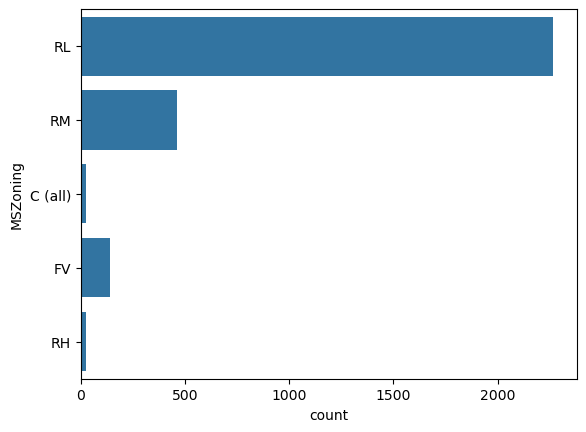

In [44]:
sns.countplot(df["MSZoning"])
plt.show()

In [45]:
mode_cat = df["MSZoning"].mode()[0]
df_copy["MSZoning"].replace(np.nan, mode_cat, inplace = True)
df_copy["MSZoning"].isnull().sum()

C:\Users\Komal\AppData\Local\Temp\ipykernel_4492\2185611952.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_copy["MSZoning"].replace(np.nan, mode_cat, inplace = True)


0

In [46]:
def oldnew_countplot(df, df_new, feature):
    plt.subplot(121)
    sns.countplot(df[feature])
    plt.title("old data")
    plt.subplot(122)
    sns.countplot(df_new[feature])
    plt.title("new data")


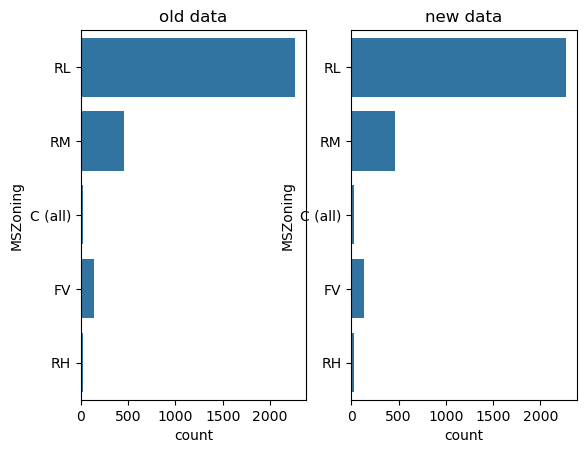

In [47]:
oldnew_countplot(df, df_copy, "MSZoning")

## handling Alley 93.216855


In [49]:
df_copy["Alley"].value_counts()

Alley
Grvl    120
Pave     78
Name: count, dtype: int64

In [50]:
alley_cont = "NA"
df_copy["Alley"].replace(np.nan,alley_cont, inplace = True)
df_copy["Alley"].isnull().sum()

C:\Users\Komal\AppData\Local\Temp\ipykernel_4492\3433862509.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_copy["Alley"].replace(np.nan,alley_cont, inplace = True)


0

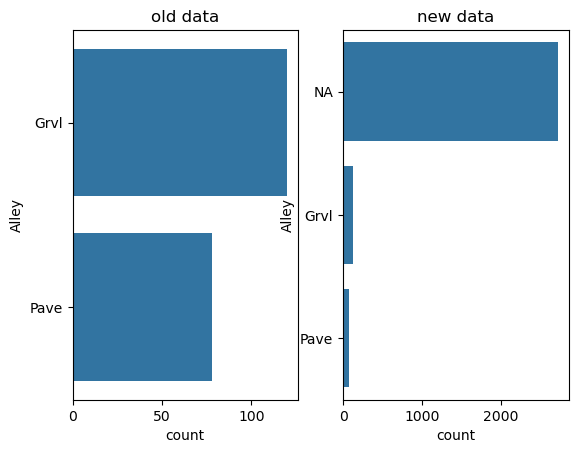

In [51]:
oldnew_countplot(df, df_copy, "Alley")

## handling LotFrontage 16.649538


In [53]:
def boxdist(df):
    
    plt.subplot(121)
    sns.boxplot(df)
    plt.subplot(122)
    sns.distplot(df)

C:\Users\Komal\AppData\Local\Temp\ipykernel_4492\273381986.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df)


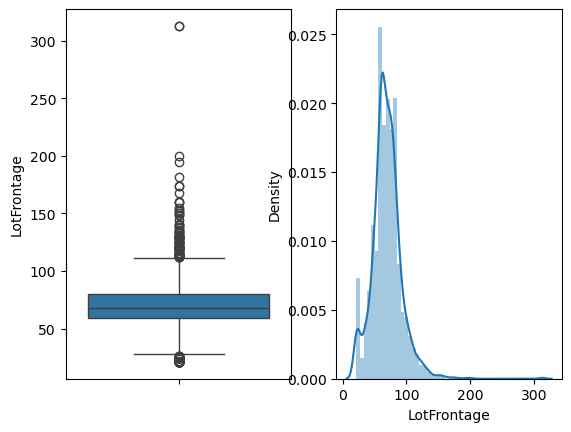

In [54]:
boxdist(df["LotFrontage"])

In [55]:
lortfrontage_median = df["LotFrontage"].median()
df_copy.replace(np.nan,lortfrontage_median , inplace=True )
df_copy["LotFrontage"].isnull().sum()

0

In [56]:
def boxhist(df, df_new, feature):
    plt.figure(figsize = (16,5))
    plt.subplot(221)
    sns.boxplot(df[feature])
    plt.title("old data")
    plt.subplot(222)
    sns.distplot(df[feature])
    plt.title("old data")
    plt.subplot(223)
    sns.boxplot(df_new[feature])
    plt.title("new data")
    plt.subplot(224)
    sns.distplot(df_new[feature])
    plt.title("new data")


C:\Users\Komal\AppData\Local\Temp\ipykernel_4492\3268961695.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature])
C:\Users\Komal\AppData\Local\Temp\ipykernel_4492\3268961695.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_new[feature])


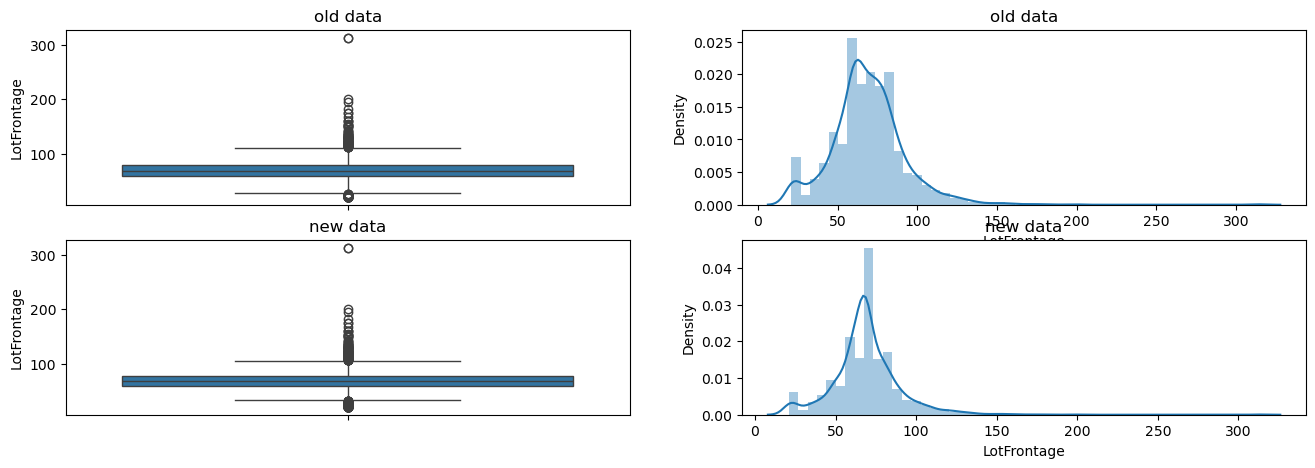

In [57]:
boxhist(df, df_copy,"LotFrontage" )

## handling Utilities¶

In [59]:
utilities_mode = df["Utilities"].mode()[0]
df_copy["Utilities"].replace(np.nan,utilities_mode, inplace = True )
df_copy["Utilities"].isnull().sum()

C:\Users\Komal\AppData\Local\Temp\ipykernel_4492\694983949.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_copy["Utilities"].replace(np.nan,utilities_mode, inplace = True )


0

## handling Exterior1st 0.034258 , Exterior2nd 0.034258¶

In [61]:
exterior1st_mode = df["Exterior1st"].mode()[0]
exterior2nd_mode = df["Exterior2nd"].mode()[0]
df_copy["Exterior1st"].replace(np.nan,exterior1st_mode, inplace = True)
df_copy["Exterior2nd"].replace(np.nan,exterior2nd_mode, inplace = True )
print("null value of exterior1st:",df_copy["Exterior1st"].isnull().sum())
print("null value of exterior2nd:",df_copy["Exterior2nd"].isnull().sum())

null value of exterior1st: 0
null value of exterior2nd: 0


C:\Users\Komal\AppData\Local\Temp\ipykernel_4492\4155941266.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_copy["Exterior1st"].replace(np.nan,exterior1st_mode, inplace = True)
C:\Users\Komal\AppData\Local\Temp\ipykernel_4492\4155941266.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behave

## handling MasVnrType = 60.50017 , MasVnrArea = 0.787941

In [63]:
df["MasVnrType"].value_counts()

MasVnrType
BrkFace    879
Stone      249
BrkCmn      25
Name: count, dtype: int64

In [64]:
masVnrType_mode = df["MasVnrType"].mode()[0]
df_copy["MasVnrType"].replace(np.nan,masVnrType_mode, inplace = True )
df_copy["MasVnrType"].isnull().sum()


C:\Users\Komal\AppData\Local\Temp\ipykernel_4492\700477915.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_copy["MasVnrType"].replace(np.nan,masVnrType_mode, inplace = True )


0

C:\Users\Komal\AppData\Local\Temp\ipykernel_4492\273381986.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df)


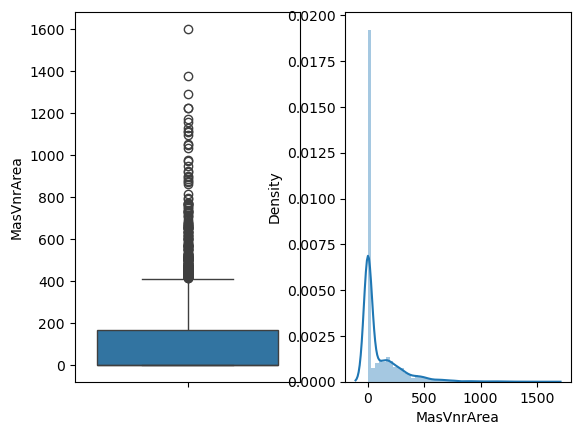

In [65]:
boxdist(df["MasVnrArea"])

In [66]:
masVnrArea_cont = 0
df_copy["MasVnrArea"].replace(np.nan,masVnrArea_cont, inplace = True )
df_copy["MasVnrArea"].isnull().sum()


C:\Users\Komal\AppData\Local\Temp\ipykernel_4492\251830946.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_copy["MasVnrArea"].replace(np.nan,masVnrArea_cont, inplace = True )


0

In [67]:
cat_bstm_null=[ "BsmtQual", 
"BsmtCond",    
"BsmtExposure" , 
"BsmtFinType1" ,  
"BsmtFinType2"]  


num_bstm_null=["BsmtFinSF1",      
"BsmtFinSF2",     
"BsmtUnfSF",      
"TotalBsmtSF",    
"BsmtFullBath",    
"BsmtHalfBath" ]   

<Axes: ylabel='Id'>

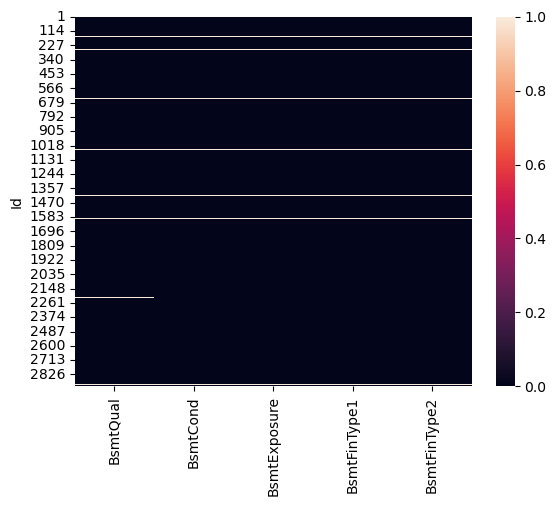

In [68]:
sns.heatmap(df[cat_bstm_null].isnull())

In [69]:
for feat in cat_bstm_null:
    print(f"the null value of {feat}: {df[feat].value_counts()}")

the null value of BsmtQual: BsmtQual
TA    1283
Gd    1209
Ex     258
Fa      88
Name: count, dtype: int64
the null value of BsmtCond: BsmtCond
TA    2606
Gd     122
Fa     104
Po       5
Name: count, dtype: int64
the null value of BsmtExposure: BsmtExposure
No    1904
Av     418
Gd     276
Mn     239
Name: count, dtype: int64
the null value of BsmtFinType1: BsmtFinType1
Unf    851
GLQ    849
ALQ    429
Rec    288
BLQ    269
LwQ    154
Name: count, dtype: int64
the null value of BsmtFinType2: BsmtFinType2
Unf    2493
Rec     105
LwQ      87
BLQ      68
ALQ      52
GLQ      34
Name: count, dtype: int64


In [70]:
bsmt_cont = "NA"
for feat in cat_bstm_null:
    df_copy[feat].replace(np.nan, bsmt_cont, inplace = True)

C:\Users\Komal\AppData\Local\Temp\ipykernel_4492\3814996395.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_copy[feat].replace(np.nan, bsmt_cont, inplace = True)


In [71]:
df_copy[cat_bstm_null].isnull().sum()

BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
dtype: int64

In [72]:
df_bsmt = df[cat_bstm_null + num_bstm_null]
df_bsmt[df_bsmt.isnull().any (axis = 1)]

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath
Id,,,,,,,,,,,
18,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
40,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
91,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
103,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
157,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
183,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
260,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
333,Gd,TA,No,GLQ,NaN,1124.0,479.0,1603.0,3206.0,1.0,0.0
343,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0


In [73]:
bsmt_cont = 0
for feat in num_bstm_null:
    df_copy[feat].replace(np.nan, bsmt_cont, inplace = True)

C:\Users\Komal\AppData\Local\Temp\ipykernel_4492\332223635.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_copy[feat].replace(np.nan, bsmt_cont, inplace = True)


In [74]:
df_copy[ num_bstm_null].isnull().sum()

BsmtFinSF1      0
BsmtFinSF2      0
BsmtUnfSF       0
TotalBsmtSF     0
BsmtFullBath    0
BsmtHalfBath    0
dtype: int64

## handling Electrical=0.034258, KitchenQual=0.034258

In [76]:
electrical_mode = df["Electrical"].mode()[0]
df_copy["Electrical"].replace(np.nan,electrical_mode, inplace = True )
df_copy["Electrical"].isnull().sum()

C:\Users\Komal\AppData\Local\Temp\ipykernel_4492\671909796.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_copy["Electrical"].replace(np.nan,electrical_mode, inplace = True )


0

In [77]:
kitchenQual_mode = df["KitchenQual"].mode()[0]
df_copy["KitchenQual"].replace(np.nan,kitchenQual_mode, inplace = True )
df_copy["KitchenQual"].isnull().sum()

C:\Users\Komal\AppData\Local\Temp\ipykernel_4492\2228525351.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_copy["KitchenQual"].replace(np.nan,kitchenQual_mode, inplace = True )


0

In [78]:
#""Functional       0.068517 MODE
#FireplaceQu     48.646797 NA

#PoolQC          99.657417 NA
#Fence           80.438506 NA
#MiscFeature     96.402878 NA
#SaleType         0.034258 MODE""

In [79]:
df["Functional"].value_counts()

Functional
Typ     2717
Min2      70
Min1      65
Mod       35
Maj1      19
Maj2       9
Sev        2
Name: count, dtype: int64

In [80]:
df["FireplaceQu"].value_counts()

FireplaceQu
Gd    744
TA    592
Fa     74
Po     46
Ex     43
Name: count, dtype: int64

In [81]:
cat_val=["PoolQC",          
"Fence",           
"MiscFeature" ]   

for feat in cat_val:
    print(f"the count {feat}: {df[feat].value_counts()}")

the count PoolQC: PoolQC
Ex    4
Gd    4
Fa    2
Name: count, dtype: int64
the count Fence: Fence
MnPrv    329
GdPrv    118
GdWo     112
MnWw      12
Name: count, dtype: int64
the count MiscFeature: MiscFeature
Shed    95
Gar2     5
Othr     4
TenC     1
Name: count, dtype: int64


In [82]:
functional_mode = df["Functional"].mode()[0]
df_copy["Functional"].replace(np.nan,functional_mode, inplace = True )
df_copy["Functional"].isnull().sum()

C:\Users\Komal\AppData\Local\Temp\ipykernel_4492\1310712729.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_copy["Functional"].replace(np.nan,functional_mode, inplace = True )


0

In [83]:
saletype_mode = df["SaleType"].mode()[0]
df_copy["SaleType"].replace(np.nan,saletype_mode, inplace = True )
df_copy["SaleType"].isnull().sum()

C:\Users\Komal\AppData\Local\Temp\ipykernel_4492\2161756742.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_copy["SaleType"].replace(np.nan,saletype_mode, inplace = True )


0

In [84]:
poolQC_cont = "NA"
df_copy["PoolQC"].replace(np.nan,poolQC_cont, inplace = True )
df_copy["PoolQC"].isnull().sum()

C:\Users\Komal\AppData\Local\Temp\ipykernel_4492\832348822.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_copy["PoolQC"].replace(np.nan,poolQC_cont, inplace = True )


0

In [85]:
fence_cont = "NA"
df_copy["Fence"].replace(np.nan,fence_cont, inplace = True )
df_copy["Fence"].isnull().sum()

C:\Users\Komal\AppData\Local\Temp\ipykernel_4492\456356646.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_copy["Fence"].replace(np.nan,fence_cont, inplace = True )


0

In [86]:
miscfeature_cont = "NA"
df_copy["MiscFeature"].replace(np.nan,miscfeature_cont, inplace = True )
df_copy["MiscFeature"].isnull().sum()

C:\Users\Komal\AppData\Local\Temp\ipykernel_4492\3657062332.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_copy["MiscFeature"].replace(np.nan,miscfeature_cont, inplace = True )


0

In [87]:
cate_feat = ["GarageType",      
"GarageFinish",   
"GarageQual",    
"GarageCond",
            ]
nume_feat = [
"GarageYrBlt",    
"GarageCars",       
"GarageArea"       
]

In [88]:
total_cat_num= df[cate_feat + nume_feat ]

total_cat_num[total_cat_num.isnull().any(axis = 1)]

,GarageType,GarageFinish,GarageQual,GarageCond,GarageYrBlt,GarageCars,GarageArea
Id,,,,,,,
40,NaN,NaN,NaN,NaN,NaN,0.0,0.0
49,NaN,NaN,NaN,NaN,NaN,0.0,0.0
79,NaN,NaN,NaN,NaN,NaN,0.0,0.0
89,NaN,NaN,NaN,NaN,NaN,0.0,0.0
90,NaN,NaN,NaN,NaN,NaN,0.0,0.0
100,NaN,NaN,NaN,NaN,NaN,0.0,0.0
109,NaN,NaN,NaN,NaN,NaN,0.0,0.0
126,NaN,NaN,NaN,NaN,NaN,0.0,0.0
128,NaN,NaN,NaN,NaN,NaN,0.0,0.0


In [89]:
nume_cont = 0
for feat in nume_feat:
    df_copy[feat].replace(np.nan,nume_cont,inplace = True)

df_copy[nume_feat].isnull().sum()

C:\Users\Komal\AppData\Local\Temp\ipykernel_4492\1133022844.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_copy[feat].replace(np.nan,nume_cont,inplace = True)


GarageYrBlt    0
GarageCars     0
GarageArea     0
dtype: int64

In [90]:
cate_cont = "NA"
for feat in cate_feat:
    df_copy[feat].replace(np.nan,cate_cont,inplace = True)

df_copy[cate_feat].isnull().sum()

C:\Users\Komal\AppData\Local\Temp\ipykernel_4492\3460793191.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_copy[feat].replace(np.nan,cate_cont,inplace = True)


GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
dtype: int64

In [91]:
df_copy.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr

In [92]:
#test_y.isnull().sum()

## Feature Transformation

## convert numerical feature to categorial feature

In [95]:
num_con =["MSSubClass", "YearBuilt","YearRemodAdd", "GarageYrBlt", "MoSold", "YrSold" ]

for feat in num_con:
    print(f"{feat}: data types = {df_copy[feat].dtypes}")

MSSubClass: data types = int64
YearBuilt: data types = int64
YearRemodAdd: data types = int64
GarageYrBlt: data types = float64
MoSold: data types = int64
YrSold: data types = int64


In [96]:
feat_dtype_convert = ['MSSubClass', 'YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']
for i in feat_dtype_convert:
    df_copy[i] = df_copy[i].astype(str)

In [97]:
for feat in num_con:
    print(f"{feat}: data types = {df_copy[feat].dtypes}")

MSSubClass: data types = object
YearBuilt: data types = object
YearRemodAdd: data types = object
GarageYrBlt: data types = object
MoSold: data types = int64
YrSold: data types = object


In [98]:
df_copy[ "MoSold"].value_counts()

MoSold
6     503
7     446
5     394
4     279
8     233
3     232
10    173
9     158
11    142
2     133
1     122
12    104
Name: count, dtype: int64

In [99]:
df_copy[ "MoSold"].unique()

array([ 2,  5,  9, 12, 10,  8, 11,  4,  1,  7,  3,  6], dtype=int64)

In [100]:
calendar.month_abbr[1]

'Jan'

In [101]:
df_copy["MoSold"]= df_copy["MoSold"].apply(lambda x : calendar.month_abbr [x])
df_copy["MoSold"].unique()

array(['Feb', 'May', 'Sep', 'Dec', 'Oct', 'Aug', 'Nov', 'Apr', 'Jan',
       'Jul', 'Mar', 'Jun'], dtype=object)

In [102]:
for feat in num_con:
   df_copy[feat]= df_copy[feat].astype("str")

In [103]:
for feat in num_con:
    print(f"{feat}: data types = {df_copy[feat].dtypes}")

MSSubClass: data types = object
YearBuilt: data types = object
YearRemodAdd: data types = object
GarageYrBlt: data types = object
MoSold: data types = object
YrSold: data types = object


In [104]:

ordinal_enc_var = [
"ExterQual",
"ExterCond",
"BsmtQual",
"BsmtCond",
"BsmtExposure",
"BsmtFinType1",
"BsmtFinType2",
"BsmtFinSF1",
"HeatingQC",
"KitchenQual",
"FireplaceQu",
"GarageQual",
"GarageCond",
"PoolQC",
"Utilities",
"pavedDrive",
"GarageFinish",
"Functional"
]
print("total number of feature converted to numerical to categorical", len(ordinal_enc_var))

total number of feature converted to numerical to categorical 18


In [105]:
df_copy['ExterQual'] = df_copy['ExterQual'].astype(CategoricalDtype(categories=['Po', 'Fa', 'TA', 'Gd', 'Ex'], ordered = True)).cat.codes

In [106]:
df_copy['ExterQual'].unique()

array([3, 2, 4, 1], dtype=int8)

In [107]:
df_copy['ExterQual']

0       3
1       2
2       3
3       2
4       3
5       2
6       3
7       2
8       2
9       2
10      2
11      4
12      2
13      3
14      2
15      2
16      2
17      2
18      2
19      2
20      3
21      2
22      3
23      2
24      2
25      3
26      2
27      3
28      2
29      2
30      2
31      2
32      3
33      2
34      4
35      3
36      2
37      2
38      2
39      2
40      2
41      2
42      2
43      2
44      2
45      4
46      3
47      3
48      2
49      2
50      2
51      2
52      1
53      3
54      2
55      2
56      3
57      3
58      4
59      2
60      2
61      2
62      3
63      2
64      2
65      3
66      2
67      3
68      2
69      3
70      2
71      2
72      2
73      2
74      3
75      2
76      2
77      2
78      2
79      2
80      2
81      2
82      2
83      2
84      2
85      3
86      3
87      3
88      1
89      2
90      2
91      2
92      2
93      2
94      2
95      4
96      3
97      2
98      2
99      2


In [108]:
df_copy['ExterQual'].value_counts()

ExterQual
2    1798
3     979
4     107
1      35
Name: count, dtype: int64

In [109]:
df_copy['BsmtFinType1'] = df_copy['BsmtFinType1'].astype(CategoricalDtype(categories=['NA', 'Unf', 'LwQ', 'Rec', 'BLQ','ALQ', 'GLQ'], ordered = True)).cat.codes
df_copy['BsmtFinType2'] = df_copy['BsmtFinType2'].astype(CategoricalDtype(categories=['NA', 'Unf', 'LwQ', 'Rec', 'BLQ','ALQ', 'GLQ'], ordered = True)).cat.codes
df_copy['BsmtQual'] = df_copy['BsmtQual'].astype(CategoricalDtype(categories=['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], ordered = True)).cat.codes
df_copy['ExterQual'] = df_copy['ExterQual'].astype(CategoricalDtype(categories=['Po', 'Fa', 'TA', 'Gd', 'Ex'], ordered = True)).cat.codes
df_copy['ExterCond'] = df_copy['ExterCond'].astype(CategoricalDtype(categories=['Po', 'Fa', 'TA', 'Gd', 'Ex'], ordered = True)).cat.codes
df_copy['Functional'] = df_copy['Functional'].astype(CategoricalDtype(categories=['Sal', 'Sev', 'Maj2', 'Maj1', 'Mod','Min2','Min1', 'Typ'], ordered = True)).cat.codes
df_copy['GarageCond'] = df_copy['GarageCond'].astype(CategoricalDtype(categories=['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], ordered = True)).cat.codes
df_copy['GarageQual'] = df_copy['GarageQual'].astype(CategoricalDtype(categories=['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], ordered = True)).cat.codes
df_copy['GarageFinish'] = df_copy['GarageFinish'].astype(CategoricalDtype(categories=['NA', 'Unf', 'RFn', 'Fin'], ordered = True)).cat.codes
df_copy['HeatingQC'] = df_copy['HeatingQC'].astype(CategoricalDtype(categories=['Po', 'Fa', 'TA', 'Gd', 'Ex'], ordered = True)).cat.codes
df_copy['KitchenQual'] = df_copy['KitchenQual'].astype(CategoricalDtype(categories=['Po', 'Fa', 'TA', 'Gd', 'Ex'], ordered = True)).cat.codes
df_copy['PavedDrive'] = df_copy['PavedDrive'].astype(CategoricalDtype(categories=['N', 'P', 'Y'], ordered = True)).cat.codes
df_copy['Utilities'] = df_copy['Utilities'].astype(CategoricalDtype(categories=['ELO', 'NASeWa', 'NASeWr', 'AllPub'], ordered = True)).cat.codes

In [110]:
df_copy['BsmtFinType1']

0       6
1       5
2       6
3       5
4       6
5       6
6       6
7       5
8       1
9       6
10      3
11      6
12      5
13      1
14      4
15      1
16      5
17     -1
18      6
19      2
20      1
21      1
22      1
23      6
24      3
25      1
26      4
27      6
28      4
29      1
30      1
31      1
32      1
33      3
34      6
35      1
36      1
37      3
38      6
39     -1
40      3
41      4
42      5
43      2
44      5
45      6
46      6
47      6
48      1
49      4
50      6
51      1
52      2
53      6
54      5
55      4
56      6
57      1
58      1
59      5
60      5
61      1
62      6
63      1
64      6
65      1
66      6
67      6
68      1
69      4
70      5
71      5
72      1
73      5
74      1
75      6
76      5
77      4
78      1
79      1
80      3
81      6
82      6
83      1
84      1
85      1
86      1
87      1
88      1
89      6
90     -1
91      3
92      5
93      3
94      6
95      5
96      5
97      3
98      5
99      5


In [111]:
df_copy['BsmtFinType1'].value_counts()

BsmtFinType1
 1    851
 6    849
 5    429
 3    288
 4    269
 2    154
-1     79
Name: count, dtype: int64

In [112]:
df_copy['Utilities']

0       3
1       3
2       3
3       3
4       3
5       3
6       3
7       3
8       3
9       3
10      3
11      3
12      3
13      3
14      3
15      3
16      3
17      3
18      3
19      3
20      3
21      3
22      3
23      3
24      3
25      3
26      3
27      3
28      3
29      3
30      3
31      3
32      3
33      3
34      3
35      3
36      3
37      3
38      3
39      3
40      3
41      3
42      3
43      3
44      3
45      3
46      3
47      3
48      3
49      3
50      3
51      3
52      3
53      3
54      3
55      3
56      3
57      3
58      3
59      3
60      3
61      3
62      3
63      3
64      3
65      3
66      3
67      3
68      3
69      3
70      3
71      3
72      3
73      3
74      3
75      3
76      3
77      3
78      3
79      3
80      3
81      3
82      3
83      3
84      3
85      3
86      3
87      3
88      3
89      3
90      3
91      3
92      3
93      3
94      3
95      3
96      3
97      3
98      3
99      3


In [113]:
df_copy['Utilities'].value_counts()

Utilities
 3    2916
-1       3
Name: count, dtype: int64

## One Hot Encoding(nominal data)


In [115]:
df_object = df_copy.copy()
df_feat = df_object.select_dtypes(include = "object").columns.tolist()
print("the length of categorical data is:", len(df_feat))
print("the categorical features are:", df_feat)



the length of categorical data is: 36
the categorical features are: ['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'BsmtCond', 'BsmtExposure', 'Heating', 'CentralAir', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'PoolQC', 'Fence', 'MiscFeature', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition']


In [116]:

df_object[df_feat].head(2)

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,Foundation,BsmtCond,BsmtExposure,Heating,CentralAir,Electrical,FireplaceQu,GarageType,GarageYrBlt,PoolQC,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,Pave,NA,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,PConc,TA,No,GasA,Y,SBrkr,68.0,Attchd,2003.0,68.0,68.0,68.0,Feb,2008,WD,Normal
1,20,RL,Pave,NA,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,1976,1976,Gable,CompShg,MetalSd,MetalSd,68.0,CBlock,TA,Gd,GasA,Y,SBrkr,TA,Attchd,1976.0,68.0,68.0,68.0,May,2007,WD,Normal


In [117]:
print("shape od dataframe before encoding:", df_object.shape)
df_object = pd.get_dummies(df_object,
                         columns =df_feat, prefix= df_feat, 
                         drop_first = True )
print("shape od dataframe after encoding:", df_object.shape)


shape od dataframe before encoding: (2919, 81)
shape od dataframe after encoding: (2919, 530)


In [118]:
df_object.shape

(2919, 530)

In [119]:
df_object.head()

,Id,LotFrontage,LotArea,Utilities,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_NA,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,YearBuilt_1875,YearBuilt_1879,YearBuilt_1880,YearBuilt_1882,YearBuilt_1885,YearBuilt_1890,YearBuilt_1892,YearBuilt_1893,YearBuilt_1895,YearBuilt_1896,YearBuilt_1898,YearBuilt_1900,YearBuilt_1901,YearBuilt_1902,YearBuilt_1904,YearBuilt_1905,YearBuilt_1906,YearBuilt_1907,YearBuilt_1908,YearBuilt_1910,YearBuilt_1911,YearBuilt_1912,YearBuilt_1913,YearBuilt_1914,YearBuilt_1915,YearBuilt_1916,YearBuilt_1917,YearBuilt_1918,YearBuilt_1919,YearBuilt_1920,YearBuilt_1921,YearBuilt_1922,YearBuilt_1923,YearBuilt_1924,YearBuilt_1925,YearBuilt_1926,YearBuilt_1927,YearBuilt_1928,YearBuilt_1929,YearBuilt_1930,YearBuilt_1931,YearBuilt_1932,YearBuilt_1934,YearBuilt_1935,YearBuilt_1936,YearBuilt_1937,YearBuilt_1938,YearBuilt_1939,YearBuilt_1940,YearBuilt_1941,YearBuilt_1942,YearBuilt_1945,YearBuilt_1946,YearBuilt_1947,YearBuilt_1948,YearBuilt_1949,YearBuilt_1950,YearBuilt_1951,YearBuilt_1952,YearBuilt_1953,YearBuilt_1954,YearBuilt_1955,YearBuilt_1956,YearBuilt_1957,YearBuilt_1958,YearBuilt_1959,YearBuilt_1960,YearBuilt_1961,YearBuilt_1962,YearBuilt_1963,YearBuilt_1964,YearBuilt_1965,YearBuilt_1966,YearBuilt_1967,YearBuilt_1968,YearBuilt_1969,YearBuilt_1970,YearBuilt_1971,YearBuilt_1972,YearBuilt_1973,YearBuilt_1974,YearBuilt_1975,YearBuilt_1976,YearBuilt_1977,YearBuilt_1978,YearBuilt_1979,YearBuilt_1980,YearBuilt_1981,YearBuilt_1982,YearBuilt_1983,YearBuilt_1984,YearBuilt_1985,YearBuilt_1986,YearBuilt_1987,YearBuilt_1988,YearBuilt_1989,YearBuilt_1990,YearBuilt_1991,YearBuilt_1992,YearBuilt_1993,YearBuilt_1994,YearBuilt_1995,YearBuilt_1996,YearBuilt_1997,YearBuilt_1998,YearBuilt_1999,YearBuilt_2000,YearBuilt_2001,YearBuilt_2002,YearBuilt_2003,YearBuilt_2004,YearBuilt_2005,YearBuilt_2006,YearBuilt_2007,YearBuilt_2008,YearBuilt_2009,YearBuilt_2010,YearRemodAdd_1951,YearRemodAdd_1952,YearRemodAdd_1953,YearRemodAdd_1954,YearRemodAdd_1955,YearRemodAdd_1956,YearRemodAdd_1957,YearRemodAdd_1958,YearRemodAdd_1959,YearRemodAdd_1960,YearRemodAdd_1961,YearRemodAdd_1962,YearRemodAdd_1963,YearRemodAdd_1964,YearRemodAdd_1965,YearRemodAdd_1966,YearRemodAdd_1967,YearRemodAdd_1968,YearRemodAdd_1969,YearRemodAdd_1970